# कोविड-19 महामारीचे अंदाज

## डेटा लोड करणे

आम्ही कोविड-19 संसर्गित व्यक्तींच्या डेटाचा वापर करू, जो [सिस्टम सायन्स आणि इंजिनिअरिंग सेंटर](https://systems.jhu.edu/) (CSSE) ने [जॉन्स हॉपकिन्स युनिव्हर्सिटी](https://jhu.edu/) येथे प्रदान केला आहे. हा डेटासेट [या GitHub रिपॉझिटरीमध्ये](https://github.com/CSSEGISandData/COVID-19) उपलब्ध आहे.


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

आम्ही `pd.read_csv` वापरून GitHub वरून सर्वात अलीकडील डेटा थेट लोड करू शकतो. काही कारणास्तव डेटा उपलब्ध नसेल, तर तुम्ही नेहमीच `data` फोल्डरमध्ये स्थानिक पातळीवर उपलब्ध असलेली प्रत वापरू शकता - फक्त खाली दिलेली `base_url` परिभाषित करणारी ओळ अनकॉमेंट करा:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

आम्ही पाहू शकतो की टेबलमधील प्रत्येक ओळ प्रत्येक देश आणि/किंवा प्रांतासाठी संक्रमित व्यक्तींची संख्या परिभाषित करते, आणि स्तंभ तारखांशी संबंधित आहेत. पुनर्प्राप्त झालेल्या व्यक्तींची संख्या आणि मृत्यूंची संख्या यांसारख्या इतर डेटासाठीही अशाच प्रकारची टेबल्स लोड केली जाऊ शकतात.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## डेटाचा अर्थ लावणे

वरील तक्त्यात `Province/State` स्तंभाची भूमिका स्पष्ट नाही. चला `Province/State` स्तंभात असलेल्या वेगवेगळ्या मूल्यांकडे पाहू:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## डेटाचे पूर्व-प्रक्रिया करणे

आपल्याला देशांना पुढील प्रदेशांमध्ये विभागण्यात रस नाही, त्यामुळे आपण प्रथम हा विभाग काढून टाकू आणि सर्व प्रदेशांची माहिती एकत्रित करून संपूर्ण देशासाठी माहिती मिळवू. हे `groupby` वापरून केले जाऊ शकते:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

आपण पाहू शकता की `groupby` वापरल्यामुळे सर्व डेटा फ्रेम्स आता देश/प्रदेशानुसार अनुक्रमित केल्या गेल्या आहेत. त्यामुळे आपण `.loc` वापरून विशिष्ट देशासाठी डेटा प्रवेश करू शकतो:|


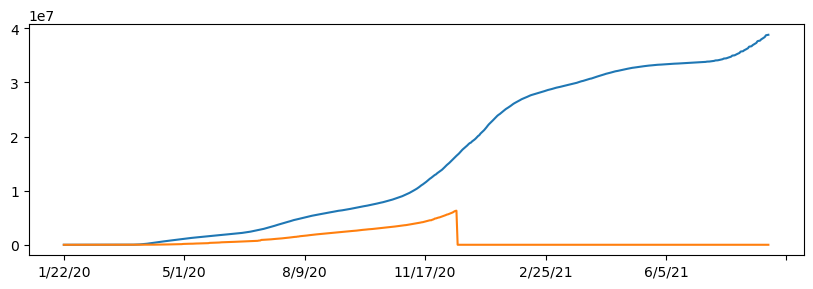

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## डेटाचा तपास करणे

आता एखाद्या विशिष्ट देशाचा तपास करण्याकडे वळूया. चला एक फ्रेम तयार करूया ज्यामध्ये तारखेनुसार अनुक्रमांकित संसर्गावरील डेटा समाविष्ट असेल:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

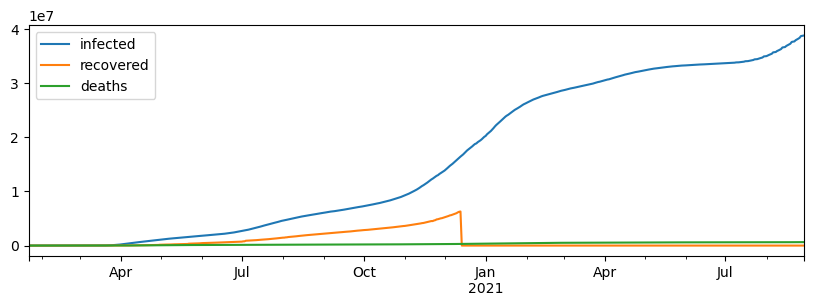

In [134]:
df.plot()
plt.show()

आता आपण दररोज नवीन संक्रमित लोकांची संख्या मोजूया. यामुळे आपल्याला महामारी किती वेगाने प्रगती करत आहे हे पाहता येईल. हे करण्याचा सर्वात सोपा मार्ग म्हणजे `diff` वापरणे:


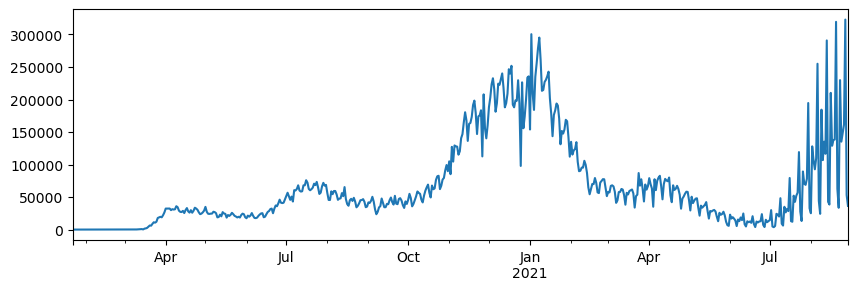

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

आम्हाला डेटामध्ये मोठ्या चढ-उतारांचा अंदाज येतो. चला महिन्यांपैकी एका महिन्याकडे अधिक बारकाईने पाहू:


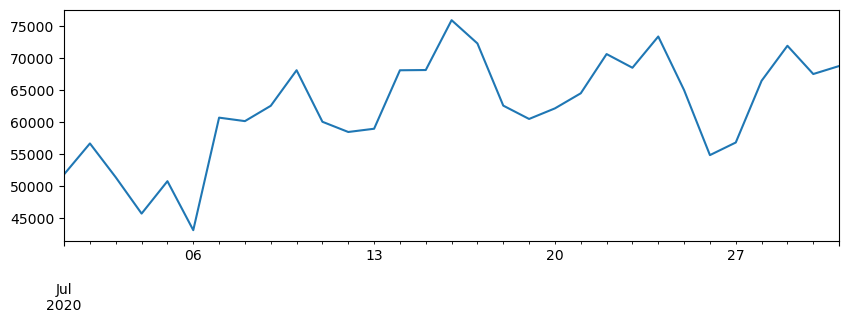

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

डेटामध्ये आठवड्याच्या चढ-उतार स्पष्टपणे दिसत आहेत. कारण आपल्याला ट्रेंड्स पाहता यावेत, म्हणूनच कर्व्ह गुळगुळीत करण्यासाठी चालू सरासरीची गणना करणे योग्य ठरेल (म्हणजे प्रत्येक दिवसासाठी आपण मागील काही दिवसांचे सरासरी मूल्य मोजू):


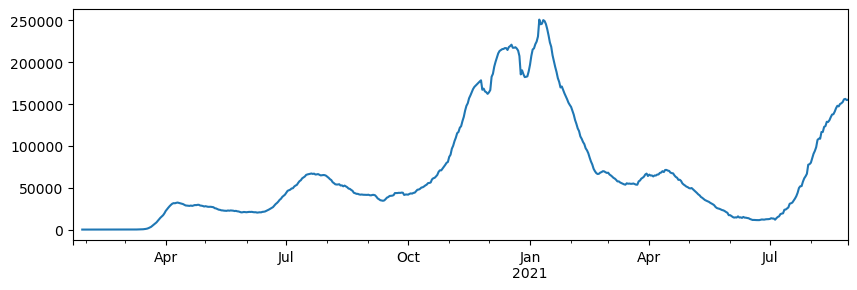

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

कारण या डेटासेटमध्ये देश आणि प्रांतांची माहिती आहे, संपूर्ण देशाची लोकसंख्या मिळवण्यासाठी आपल्याला थोडं हुशारीने वागावं लागेल:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

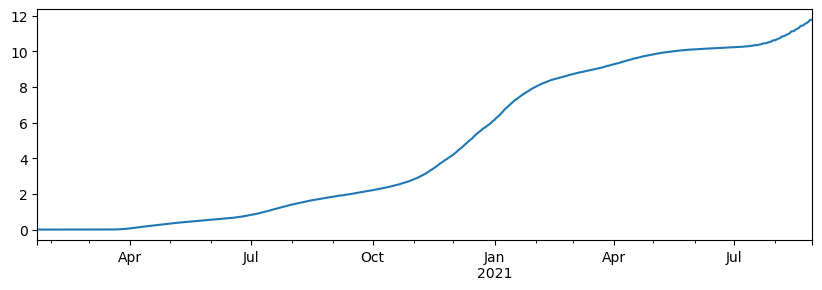

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## $R_t$ ची गणना

रोग किती संसर्गजन्य आहे हे पाहण्यासाठी, आपण **मूल पुनरुत्पादन संख्या** $R_0$ पाहतो, जी दर्शवते की संसर्गित व्यक्ती आणखी किती लोकांना संसर्गित करेल. जेव्हा $R_0$ 1 पेक्षा जास्त असते, तेव्हा साथीचा रोग पसरण्याची शक्यता असते.

$R_0$ हा रोगाचा एक गुणधर्म आहे आणि तो लोकांनी साथीचा रोग मंदावण्यासाठी घेतलेल्या काही संरक्षणात्मक उपायांचा विचार करत नाही. साथीच्या रोगाच्या प्रगतीदरम्यान, आपण कोणत्याही विशिष्ट वेळेस $t$ वरील पुनरुत्पादन संख्या $R_t$ अंदाजे मोजू शकतो. असे दाखवले गेले आहे की ही संख्या साधारणपणे 8 दिवसांच्या कालावधीचा विचार करून अंदाजे मोजता येते, आणि $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
जिथे $I_t$ हा दिवस $t$ वरील नवीन संसर्गित व्यक्तींची संख्या आहे.

आता आपण आपल्या साथीच्या रोगाच्या डेटासाठी $R_t$ मोजूया. हे करण्यासाठी, आपण 8 `ninfected` मूल्यांचा रोलिंग विंडो घेऊ, आणि वरील गुणोत्तर मोजण्यासाठी फंक्शन लागू करू:


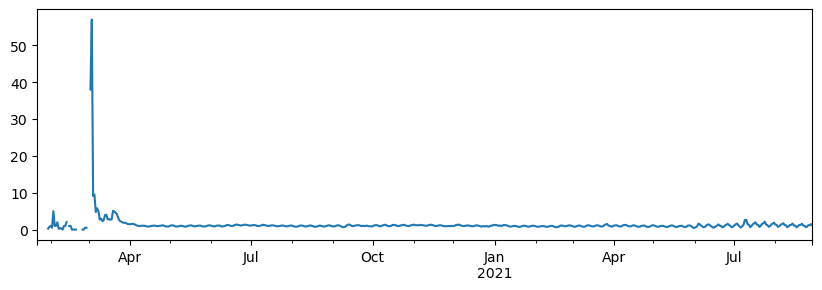

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

तुम्ही पाहू शकता की ग्राफमध्ये काही अंतर आहेत. ही अंतर `NaN` किंवा डेटासेटमध्ये `inf` मूल्ये असल्यामुळे होऊ शकतात. `inf` हे 0 ने भाग केल्यामुळे होऊ शकते, आणि `NaN` हे गहाळ डेटा किंवा निकालाची गणना करण्यासाठी डेटा उपलब्ध नसल्याचे दर्शवू शकते (जसे की आपल्या फ्रेमच्या सुरुवातीला, जिथे रुंदी 8 असलेली रोलिंग विंडो अद्याप उपलब्ध नाही). ग्राफ अधिक चांगला दिसण्यासाठी, आपल्याला `replace` आणि `fillna` फंक्शन वापरून ही मूल्ये भरावी लागतील.

आता आपण महामारीच्या सुरुवातीकडे अधिक बारकाईने पाहू. आपण y-अक्षाच्या मूल्यांना 6 च्या खाली मर्यादित करू, जेणेकरून अधिक स्पष्टपणे पाहता येईल, आणि 1 वर एक आडवी रेषा काढू.


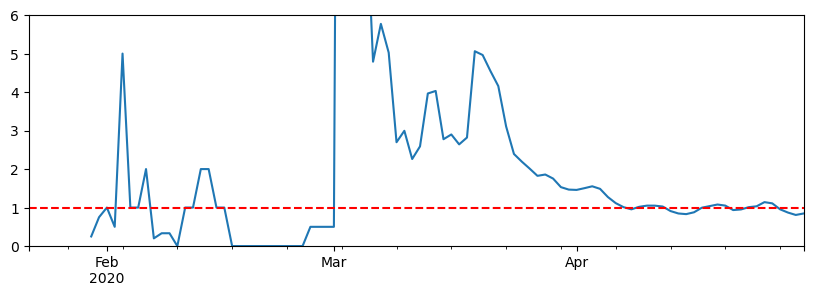

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

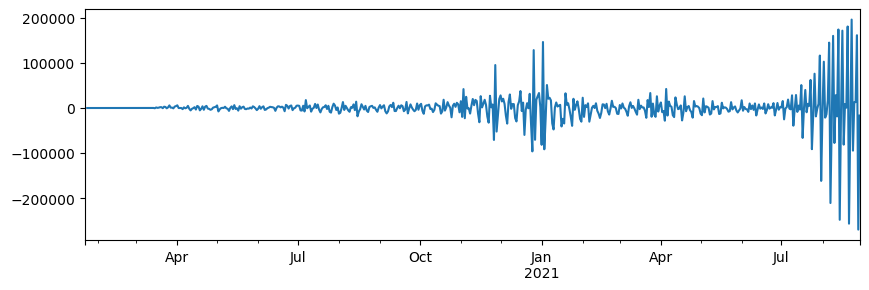

In [143]:
df['ninfected'].diff().plot()
plt.show()

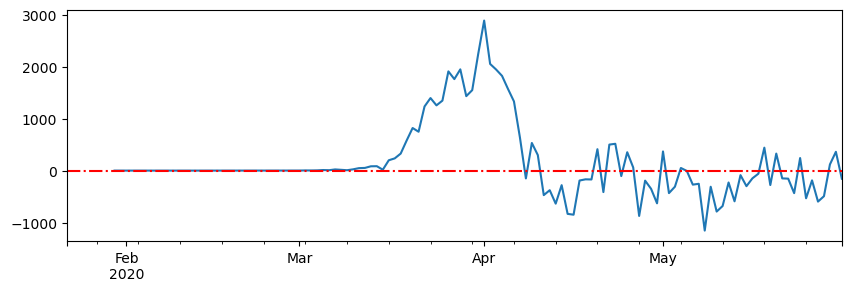

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## आव्हान

आता कोड आणि डेटासोबत अधिक प्रयोग करण्याची वेळ आली आहे! येथे काही सूचना दिल्या आहेत ज्यावर तुम्ही प्रयोग करू शकता:
* वेगवेगळ्या देशांमध्ये महामारीचा प्रसार कसा झाला ते पाहा.
* तुलना करण्यासाठी अनेक देशांसाठी $R_t$ ग्राफ एका प्लॉटवर काढा, किंवा बाजू-बाजूने अनेक प्लॉट तयार करा.
* मृत्यू आणि बरे होण्याचे प्रमाण संक्रमित प्रकरणांच्या संख्येशी कसे संबंधित आहे ते पाहा.
* संसर्ग दर आणि मृत्यू दर यांचे दृश्यात्मक संबंध पाहून आणि काही अपवाद शोधून, एक सामान्य आजार किती काळ टिकतो हे शोधण्याचा प्रयत्न करा. हे शोधण्यासाठी तुम्हाला वेगवेगळ्या देशांकडे पाहावे लागेल.
* मृत्यू दराची गणना करा आणि तो वेळेनुसार कसा बदलतो ते पाहा. गणना करण्यापूर्वी एका टाइम सिरीजला शिफ्ट करण्यासाठी तुम्हाला आजार किती दिवस टिकतो हे लक्षात घेण्याची गरज असू शकते.


## संदर्भ

तुम्ही COVID महामारीच्या प्रसारावरील पुढील अभ्यासांचा संदर्भ घेऊ शकता:
* [COVID महामारी दरम्यान Rt अंदाजासाठी Sliding SIR मॉडेल](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), ब्लॉग पोस्ट [Dmitry Soshnikov](http://soshnikov.com) यांच्याकडून
* T.Petrova, D.Soshnikov, A.Grunin. [जागतिक COVID-19 उद्रेकासाठी वेळ-आधारित पुनरुत्पादन क्रमांकाचा अंदाज](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [वरील पेपरसाठी GitHub वरील कोड](https://github.com/shwars/SlidingSIR)



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) चा वापर करून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात घ्या की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर केल्यामुळे उद्भवणाऱ्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
